$$P(R) = p_{g} R^{n} - R^{n - 1} + \sum_{d = 0}^{n - 2} f_{n - 1 - d} p_{n - 1 - d} R^{d}$$

Soit $d$ tel que $f_{n - 1 - d} > 0$. Soit $\varepsilon > 0$. Alors $P(\varepsilon) \geqslant f_{n - 1 - d} p_{n - 1 - d} \varepsilon^{d} - \varepsilon^{n - 1} \sim f_{n - 1 - d} p_{n - 1 - d} \varepsilon^{d} > 0$. Et $P(1) = 0$ avec $P$ non nul lorsque $1 < |X|$. Or $\lim_{X \to +\infty} P(X) = +\infty$. Donc $P$ s'annule en $r_{0} \in ]0, 1[$.

De plus, $\forall r \in ]r_{0}, 1[, P(r) < 0$. C'est-à-dire $g(r) - f(r) = P(r) < 0$ où $g(R) = p_{g} R^{n} + \sum_{d = 0}^{n - 2} f_{n - 1 - d} p_{n - 1 - d} R^{d}$ et $f(R) = R^{n - 1}$. Donc $g(r) < f(r)$.

Or, le théorème de Rouché prouve que $g - f$ a le même nombre de racines (ici $n - 1$) que $f$ à l'intérieur du contour $\gamma_{r} = \lbrace z \in \mathbb{C}, |z| = r \rbrace$ si $\forall z \in \gamma_{r}, |g(z)| < |f(z)|$.

Soit $r \in ]r_{0}, 1[$, alors pour tout $z \in \gamma_{r}$,

$$\begin{align*}|g(z)|
  &=\left| p_{g} z^{n} + \sum_{d = 0}^{n - 2} f_{n - 1 - d} p_{n - 1 - d} z^{d} \right|
\\&\leqslant p_{g} \left| z^{n} \right| + \sum_{d = 0}^{n - 2} f_{n - 1 - d} p_{n - 1 - d} \left| z^{d} \right|
\\&= p_{g} r^{n} + \sum_{d = 0}^{n - 2} f_{n - 1 - d} p_{n - 1 - d} z^{d}
\\&= g(r)
\\&< f(r)
\\&= |f(z)|
\end{align*}$$

Donc $\forall r \in ]r_{0}, 1[, \forall z \in \gamma_{r}, |g(z)| < |f(z)|$. Ainsi $Q := P | (X - 1)$ a exactement $n - 1$ racines de module inférieur à $r$. En faisant tendre $r$ vers $r_{0}$, il vient que les racines de $Q$ sont donc de module inférieur à $r_{0}$. Nous pouvons même montrer que $Q$ admet une unique racine de module $r_{0}$. De fait, si $r$ est une racine de module $r_{0}$, alors $|r^{n - 1}| = r_{0}^{n - 1} = p_{g} r_{0}^{n} + \sum_{d = 0}^{n - 2} f_{n - 1 - d} p_{n - 1 - d} r_{0}^{d}= p_{g} \left| r^{n} \right| + \sum_{d = 0}^{n - 2} f_{n - 1 - d} p_{n - 1 - d} \left| r^{d} \right|$, correspond au cas d'égalité de l'inégalité triangulaire, atteint uniquement lorsque tous les $(r^{d})_{0 \leqslant d \leqslant n - 2}$ de fréquence non nulle sont colinéaires avec $r^{n}$. Donc réels, donc $r^{n - 1}$ réel, donc $r$ réel. Donc $r = r_{0}$.

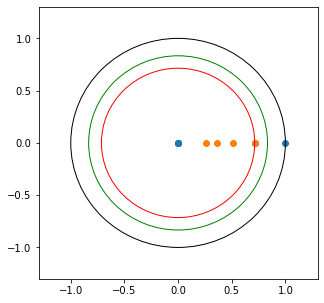

In [90]:
import matplotlib.pyplot as plt
import numpy as np

z = 1  # Nombre de zéros
n = 5  # Nombre de numéros (zéros exclus)
p = lambda d: n / (n + z) / (d + 1)
f = np.zeros(n - 1)
f[0] = 1
# f = np.random.random(n - 1)
f /= np.sum(f)
p_g = 1 - f @ p(np.arange(1, n))
P = np.append((p_g, -1), f * p(np.arange(1, n)))
r = np.roots(P)

plt.figure(figsize=(5, 5))
plt.xlim([-1.3, 1.3])
plt.ylim([-1.3, 1.3])
circle0 = plt.Circle((0, 0), 1, edgecolor='k', fill=False)
circle1 = plt.Circle((0, 0), np.abs(r[1]), edgecolor='r', fill=False)
circle2 = plt.Circle((0, 0), n / (n + z), edgecolor='g', fill=False)
plt.gcf().gca().add_patch(circle0)
plt.gcf().gca().add_patch(circle1)
plt.gcf().gca().add_patch(circle2)
plt.scatter(np.real(r), np.imag(r))
plt.scatter(np.real(r[1] ** np.arange(1, n)), np.imag(r[1] ** np.arange(1, n)))
plt.show()

In [64]:
f @ (np.real(r[1]) ** -np.arange(1, n)), 1 + z / n

(1.0561844951833257, 1.0277777777777777)

In [66]:
def r0(f):
    p_g = 1 - f @ p(np.arange(1, n))
    P = np.append((p_g, -1), f * p(np.arange(1, n)))
    r = np.roots(P)
    return r[1]

In [73]:
f = lambda f1: np.array([f1, 1 - f1])

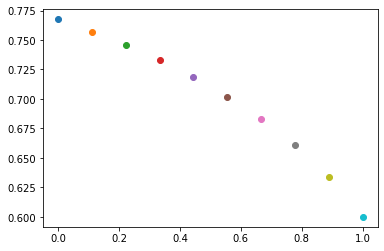

In [87]:
N = 10
fs = f(np.linspace(0, 1, N))
for i in range(N):
    plt.scatter(fs[0, i], r0(fs[:, i]))